In [23]:
import os

graph_file_path = os.path.join("..", "data", "connectivity", "graph", "easy", "full", "graph1.txt")

if os.path.exists(graph_file_path):
    with open(graph_file_path, 'r', encoding='utf-8') as file:
        content = file.readlines()
        print("File Content:")
        for line in content:
            print(line.strip())
else:
    print(f"File not found: {graph_file_path}")


File Content:
5 3 5
0 2
0 1
3 4
1 2
3 4
0 1
1 0
2 1
3 1
3 2
0 3
3 0
1 4


In [21]:
import os
import matplotlib.pyplot as plt
import networkx as nx

def process_task(task):
    # Define the path to the data folder
    base_path = os.path.join("..", "data")

    # Define difficulty levels
    difficulties = ["easy", "medium", "hard"]

    # Initialize the dictionary to store results
    results = {difficulty: {"avg_nodes": 0, "avg_edges": 0, "avg_degree": 0} for difficulty in difficulties}

    # Traverse each difficulty level
    for difficulty in difficulties:
        task_path = os.path.join(base_path, task, "graph", difficulty, "full")
        if not os.path.exists(task_path):
            continue

        # Get all graph files
        graph_files = [f for f in os.listdir(task_path) if f.endswith(".txt")]

        # Initialize statistics
        total_nodes = 0
        total_edges = 0
        total_degree = 0
        graph_count = 0

        for graph_file in graph_files:
            file_path = os.path.join(task_path, graph_file)

            # Read graph data
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()

                # Get node and edge count
                first_line = lines[0].strip().split()[:2]  # Only take the first two numbers
                n, m = int(first_line[0]), int(first_line[1])

                # Build graph with the first 'm' edges
                G = nx.Graph()
                for line in lines[1:m+1]:  # Only take the first 'm' lines after the first one
                    edge = tuple(map(int, line.strip().split()[:2]))  # Only take the first two numbers as edges
                    G.add_edge(*edge)

                # Update statistics
                total_nodes += n
                total_edges += m
                total_degree += sum(dict(G.degree()).values()) / n  # Average degree
                graph_count += 1

        # Calculate averages
        if graph_count > 0:
            results[difficulty]["avg_nodes"] = total_nodes / graph_count
            results[difficulty]["avg_edges"] = total_edges / graph_count
            results[difficulty]["avg_degree"] = total_degree / graph_count

    # Visualization
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Three plots in one row

    x_labels = [f"{task}-{difficulty}" for difficulty in difficulties]
    x_positions = [i for i in range(len(x_labels))]  # Create positions for all task-difficulty labels

    for i, metric in enumerate(["avg_nodes", "avg_edges", "avg_degree"]):
        ax = axes[i]
        bar_width = 0.2  # Set the bar width

        for j, difficulty in enumerate(difficulties):
            values = [results[difficulty][metric]]
            ax.bar([x + bar_width * j for x in x_positions], values, width=bar_width, color=colors[j], label=difficulty)

            # Add the numerical values on top of the bars
            for idx, value in enumerate(values):
                ax.text(x_positions[idx] + bar_width * j, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

        ax.set_title(f"Visualization of {metric.replace('_', ' ').title()} by Difficulty")
        ax.set_xlabel("Task-Difficulty")
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.set_xticks(x_positions)  # Set positions for ticks
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.legend()

    fig.tight_layout()
    plt.show()


# Visualization Overview:
This visualization presents a comparative analysis of graph-related metrics across different difficulty levels (easy, medium, hard) for a specific task. It generates bar plots for three key metrics:

1. Average Number of Nodes (avg_nodes): This metric shows the average number of nodes across all graphs for a given difficulty level.

2. Average Number of Edges (avg_edges): This shows the average number of edges for graphs of the given difficulty level.

3. Average Degree (avg_degree): This metric represents the average degree of nodes, calculated as the average number of edges per node across all graphs.


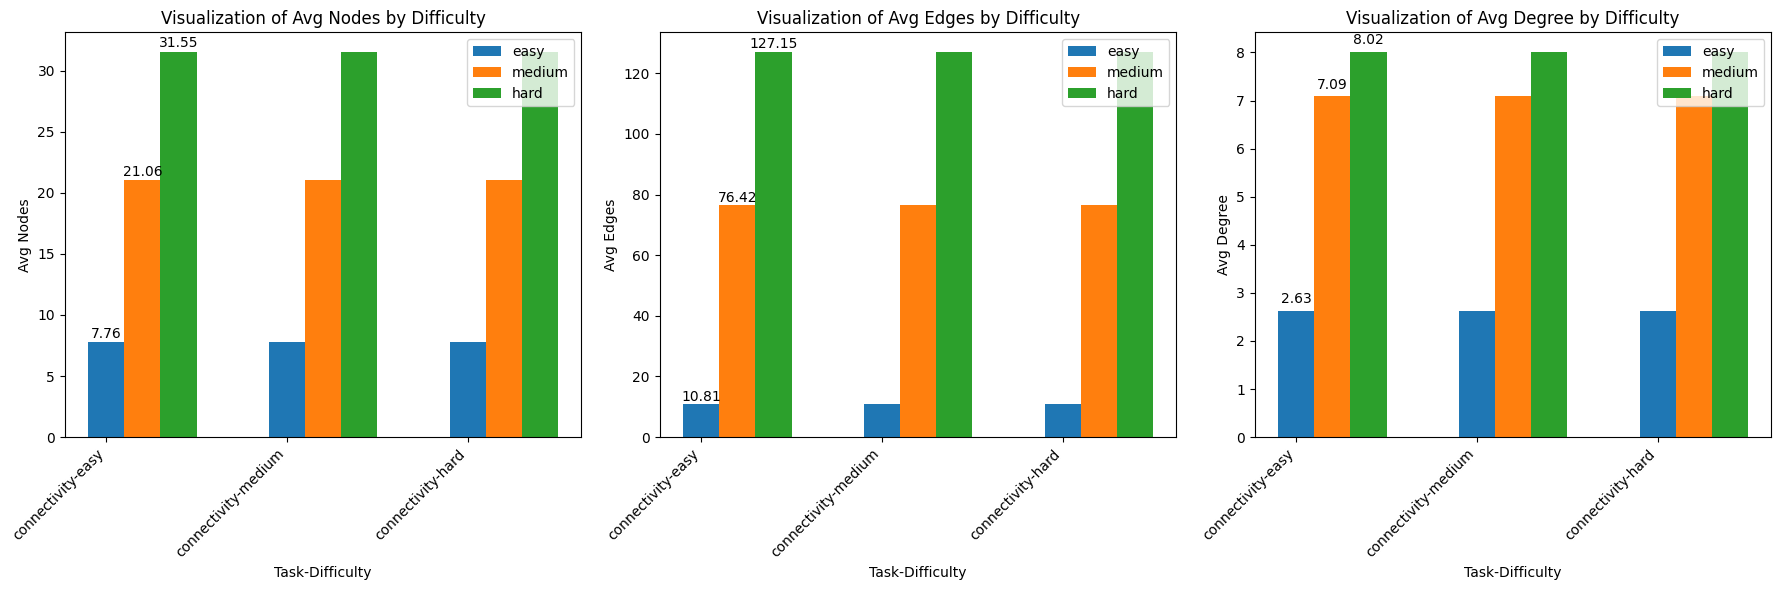

In [22]:
process_task("connectivity") 


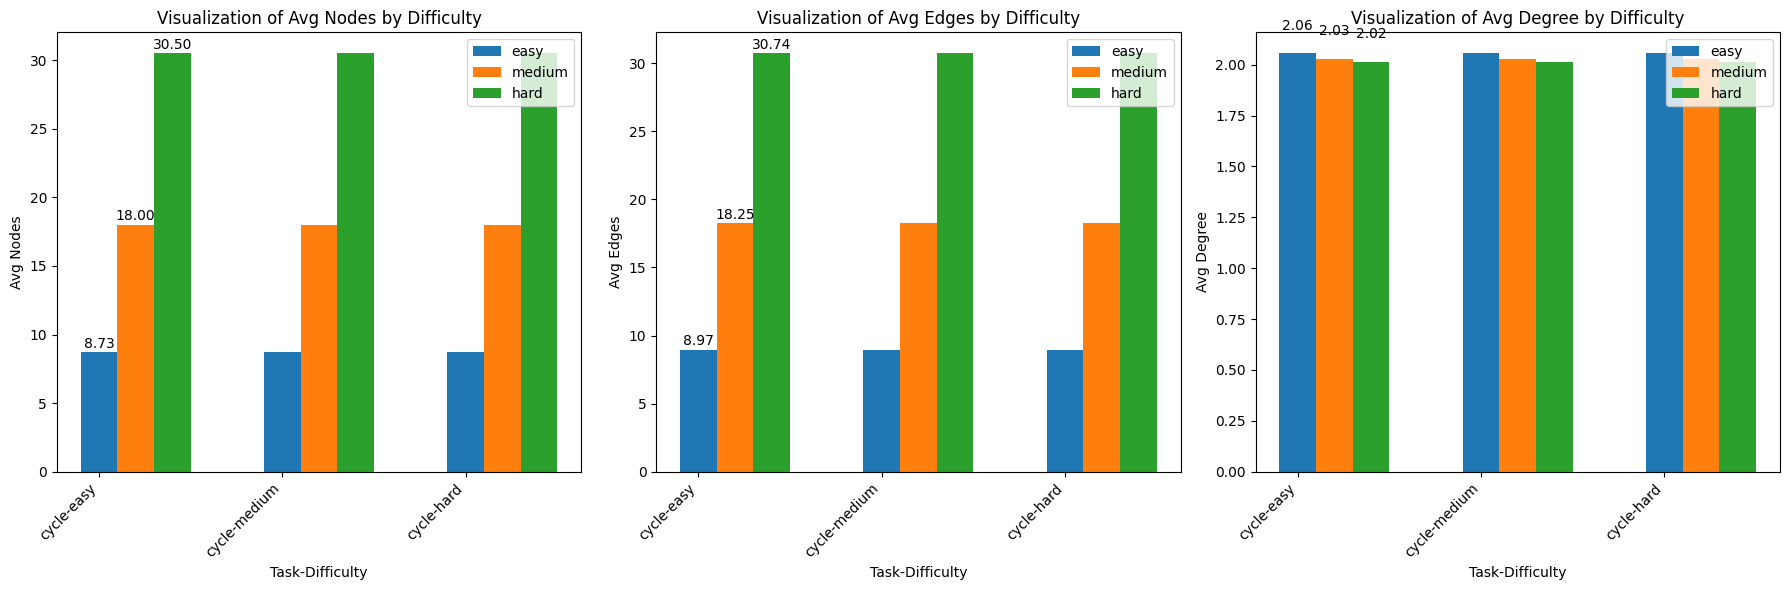

In [24]:
process_task("cycle") 


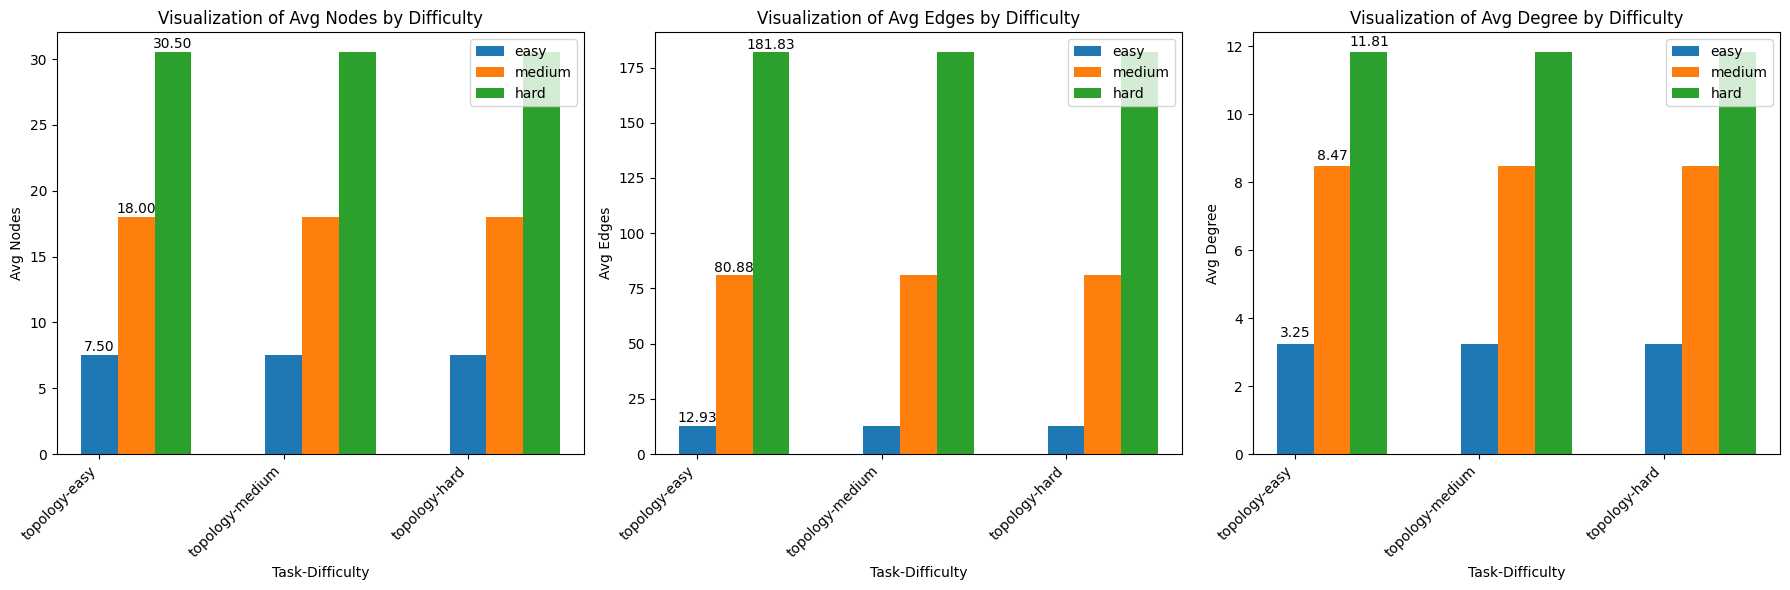

In [25]:
process_task("topology") 
